<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/cv2/1_OpneCv_image_processing_and_CameraCapute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_path = "/content/drive/MyDrive/dataSet/img/2.jpg"

In [ ]:
def show_img(img):
    cv2.imshow("image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

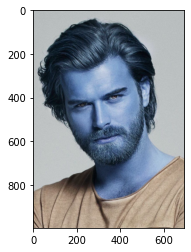

In [ ]:
plt.imshow(im)

In [ ]:
im = cv2.imread(img_path)
# cv2_imshow(img_path)

## camera capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2

In [ ]:
im = cv2.imread("2.jpg")

In [ ]:
cv2.imshow("image",im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Image

In [ ]:
display(Image("2.jpg"))

In [ ]:
display(Image("1.jpg"))

## Camera capture for local connection

In [ ]:
import cv2

In [ ]:
# cap = cv2.VideoCapture(0)
# while True:
#     ret, f = cap.read()
#     cv2.imshow("v", f)
#     if cv2.waitKey(0) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

## Save frame as video

In [ ]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*"DIVX")
out = cv2.VideoWriter("avi.mp4", fourcc, 20.0, (640, 480))
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame, 0)
        out.write(frame)
        # cv2.imshow("frame")
        cv2.imshow("frame", frame)
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np

In [ ]:
img = np.zeros((513, 513, 3), np.int8)

In [ ]:
img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)
show_img(img)

In [ ]:
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
show_img(img)

In [ ]:
img = cv2.circle(img, (477, 63), 63, (0, 0, 255), -1)
show_img(img)

In [ ]:
img = cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, 255, -1)
show_img(img)

In [ ]:
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv2.polylines(img, [pts], True, (0, 255, 255))
show_img(img)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
show_img(img)

### Mouse Handler

In [ ]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)

In [ ]:
img = np.zeros((512, 512, 3), np.uint8)
img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_circle)
while 1:
    cv2.imshow("image", img)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
    cv2.destroyWindow("image")
cv2.destroyAllWindows()

## Trackbar as Color pallatte

In [ ]:
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow("image")
def nothing(x):
    pass
cv2.createTrackbar("R", "image", 0, 255, nothing)
cv2.createTrackbar("G", "image", 0, 255, nothing)
cv2.createTrackbar("B", "image", 0, 255, nothing)
switch = "0 : OFF \n1: ON"
cv2.createTrackbar(switch, "image", 0, 1, nothing)
while 1:
    cv2.imshow("image", img)
    k = cv2.waitKey(0) and 0xFF
    if k == 27:
        break
    r = cv2.getTrackbarPos("R", "image")
    g = cv2.getTrackbarPos("G", "image")
    b = cv2.getTrackbarPos("B", "image")
    s = cv2.getTrackbarPos(switch, "image")

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]
cv2.destroyAllWindows()

## Working on images

### Accessing and Modifying pexels values

In [ ]:
import cv2
import numpy as np

In [ ]:
im_path = "2.jpg"
img = cv2.imread(im_path)

In [ ]:
im = img[100, 100]
show_img(im)

### Red pixels

In [ ]:
im = img.item(10, 10, 2)
show_img(im)

### Select part from **img**

In [ ]:
im = img[150:300, 100:300]
show_img(im)

In [ ]:
im = img[150:300, 100:300]
img[200:350, 300:500] = im
show_img(img)

### Spliting and merging channels

In [ ]:
img = cv2.imread(im_path)

In [ ]:
b, g, r = cv2.split(img)
im = cv2.merge((b, g, r))
show_img(im)

#### or

In [ ]:
b = img[:, :, 0]
show_img(b)

### make any pixel zero

In [ ]:
im = img
im[:, :, 2] = 0
# im[:, :, 1] = 0
# im[:, :, 0] = 0
show_img(im)

## Image Processing in OpenCV

## Changing color space

In [ ]:
flags = [i for i in dir(cv2) if i.startswith("COLOR_")]
# flags

In [ ]:
cap = cv2.VideoCapture(0)
while 1:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lb = np.array([110, 50, 50])
    ub = np.array([130, 255, 255])
    mask = cv2.inRange(hsv, lb, ub)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow("img", hsv)
    cv2.imshow("image", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

## Image Thresholding

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("2.jpg")
ret, t1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
ret, t6 = cv2.threshold(img, 127, 255, cv2.THRESH_MASK)
# ret, t7 = cv2.threshold(img, 127, 255, cv2.THRESH_OTSU)

title = ["original",'binary', 'bi-inv', 'trunc', 'tozero', 'tozero-inv', 'mask']
images = [img, t1, t2, t3, t4, t5, t6]

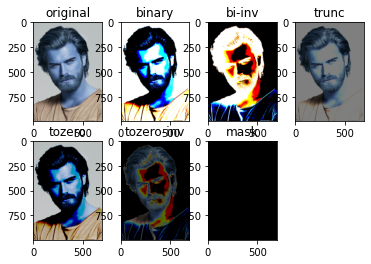

In [ ]:
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], "gray")
    plt.title(title[i])
plt.show()

### Adaptive thresholding

In [ ]:
img = cv2.imread("2.jpg",0)
img = cv2.medianBlur(img, 5)
ret, t = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
at1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
at2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
titles = ["Original", "thresh", "at-mean", "at-gaussian"]
images = [img, t, at1, at2]

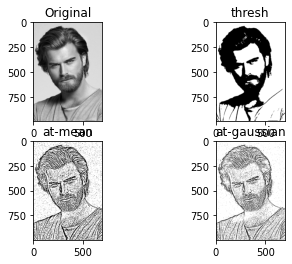

In [ ]:
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])